# **Water Elevation Dataset**

In this colab notebook we work with the elevation dataset found on https://developers.google.com/earth-engine/datasets/catalog/HYCOM_sea_surface_elevation

Here we create a plot of the mean elevation throughout the months and years in our ROI. We also have created a gif that allows us to better understand the elevation change and how it compares to other features that are looked at.

# **Necessary Downloads**

In [ ]:
pip install geemap

     |████████████████████████████████| 430kB 3.9MB/s 
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1


In [ ]:
import tensorflow as tf

# check that a GPU is enabled
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
!earthengine authenticate

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=aiWZqoMSHylg9ipL1qIcgiSOZyXPd43bJNJEK8PlFuY&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g70L8GVXeCMjuVPWUK7dqZGJNibu5xYH9A4PRi1UC-enZDVc1la2gU

Successfully saved authorization token.


In [ ]:
!pip install earthengine-api
!pip install folium

In [ ]:
import ee
import geemap
from geemap import *
# geemap.update_package()
ee.Initialize()

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Getting the Geometry**

In [ ]:
#from class
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

jsonFile = '/content/drive/My Drive/Final_Project/map.geojson' #change if you want to run

with open(jsonFile, 'r') as file:
  jsonLoad = json.load(file)

geometry = jsonLoad['features'][0]['geometry']

In [ ]:
geometry

{'coordinates': [[[-75.146484375, 32.32427558887655],
   [-9.31640625, 32.32427558887655],
   [-9.31640625, 46.49839225859763],
   [-75.146484375, 46.49839225859763],
   [-75.146484375, 32.32427558887655]]],
 'type': 'Polygon'}

# **Getting Elevation Graphs**

In [ ]:
from datetime import datetime, timedelta

In [ ]:
years = [2014,2015,2016]
days_aggregate = 30
day_step = 7

In [ ]:
sd_2014_0 = datetime(years[0], month=1, day=1)
ed_2014_0 = sd_2014_0 + timedelta(days=days_aggregate)

sd_2015_0 = datetime(years[1], month=1, day=1)
ed_2015_0 = sd_2015_0 + timedelta(days=days_aggregate)

sd_2016_0 = datetime(years[2], month=1, day=1)
ed_2016_0 = sd_2016_0 + timedelta(days=days_aggregate)

In [ ]:
v0_2014 = list()
v0_2015 = list()
v0_2016 = list()

dates = list()

In [ ]:
aoi = ee.Geometry(geometry)
ic = ee.ImageCollection('HYCOM/sea_surface_elevation').filterBounds(aoi).select('surface_elevation')

In [ ]:
sd_2014_0 = '2014-01-01'
ed_2014_0 = '2014-12-31'

sd_2015_0 = '2015-01-01'
ed_2015_0 = '2015-12-31'

sd_2016_0 = '2016-01-01'
ed_2016_0 = '2016-12-31'

In [ ]:
ic_v02014 = ic.filterDate(sd_2014_0, ed_2014_0)

ic_v02015 = ic.filterDate(sd_2015_0, ed_2015_0)

ic_v02016 = ic.filterDate(sd_2016_0, ed_2016_0)


In [ ]:
monthFilter1 = ee.Filter.calendarRange(1, 1,"month")
monthFilter2 = ee.Filter.calendarRange(2, 2,"month")    
monthFilter3 = ee.Filter.calendarRange(3, 3,"month")    
monthFilter4 = ee.Filter.calendarRange(4, 4,"month")    
monthFilter5 = ee.Filter.calendarRange(5, 5,"month")    
monthFilter6 = ee.Filter.calendarRange(6, 6,"month")    
monthFilter7 = ee.Filter.calendarRange(7, 7,"month")    
monthFilter8 = ee.Filter.calendarRange(8, 8,"month")    
monthFilter9 = ee.Filter.calendarRange(9, 9,"month")    
monthFilter10 = ee.Filter.calendarRange(10, 10,"month")    
monthFilter11 = ee.Filter.calendarRange(11, 11,"month")    
monthFilter12 = ee.Filter.calendarRange(12, 12,"month")    

In [ ]:
# ele1 = ic_v02014.filter(monthFilter1)

gif1 = ic.filterDate(sd_2014_0, ed_2014_0)
gif2 = ic.filterDate(sd_2015_0, ed_2015_0)
gif3 = ic.filterDate(sd_2016_0, ed_2016_0)
gif = ic.filterDate(sd_2014_0, ed_2016_0)

In [ ]:
def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.mean(), geometry)
    
    return image.set(dict)

#withMean = collection.map(setProperty)

In [ ]:
mean_spatial_2014_v0 = ic_v02014.map(setProperty)

mean_spatial_2015_v0 = ic_v02015.map(setProperty)

mean_spatial_2016_v0 = ic_v02016.map(setProperty)


In [ ]:
v0_2014 = mean_spatial_2014_v0.aggregate_array('surface_elevation').getInfo()

v0_2015 = mean_spatial_2015_v0.aggregate_array('surface_elevation').getInfo()

v0_2016 = mean_spatial_2016_v0.aggregate_array('surface_elevation').getInfo()


In [ ]:
len(v0_2016)

359

In [ ]:
v0_2014 = np.array(v0_2014)
v0_2014 = (v0_2014/1000)
v0_2014 = v0_2014[:359] 

v0_2015 = np.array(v0_2015)
v0_2015 = (v0_2015/1000)
v0_2015 = v0_2015[:359] 

v0_2016 = np.array(v0_2016)
v0_2016 = (v0_2016/1000) 
v0_2016 = v0_2016[:359] 


In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 30):
    xlabel.append(months[i])

xlabel = xlabel[:359]

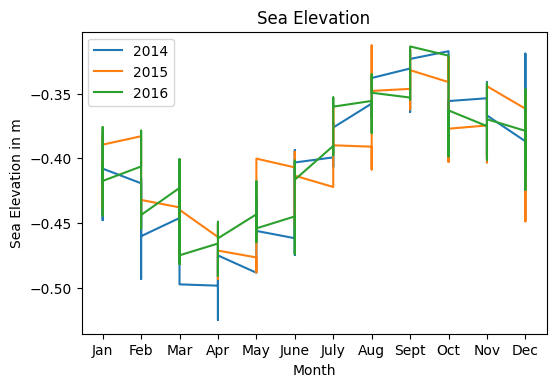

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, v0_2014)
plt.plot(xlabel, v0_2015)
plt.plot(xlabel, v0_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Sea Elevation in m')
plt.title('Sea Elevation')
plt.show()

# **Generating Gif**

In [ ]:
video_args = {
  'dimensions': 287,
  'region': aoi,
  'framesPerSecond': 120,
  # 'crs': 'EPSG:3',
  'min': -400.0,
  'max': 350.0,
  'palette': ['blue', 'cyan', 'yellow', 'red'],
}

gif_url=gif.getVideoThumbURL(video_args)
gif1_url=gif1.getVideoThumbURL(video_args)
gif2_url=gif2.getVideoThumbURL(video_args)
gif3_url=gif3.getVideoThumbURL(video_args)

In [ ]:
gif_url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/f37c5a595a6c4aa9f30c020459ae7af0-15d79f4d0f09e2f2a0dbc460420eec48:getPixels'

In [ ]:
gif1_url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/b3b10923430a5fff0809d16de5351beb-974235da03c16536fe601482d06643f8:getPixels'

In [ ]:
gif2_url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/42f20855f50283137e167a4774096831-b8d09da20746f9e217eca3d823a4ffff:getPixels'

In [ ]:
gif3_url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/39bc1ce7313267d1ec1a0be037d2ec00-61bd41e8d546ca8bc1ec3427b6a76856:getPixels'

In [ ]:
import urllib.request
gif_name = '/content/drive/My Drive/Final_Project/gifs/elevation3years.gif' # <-- Need to define
urllib.request.urlretrieve(gif_url, gif_name)

('/content/drive/My Drive/Final_Project/gifs/elevation3years.gif',
 <http.client.HTTPMessage at 0x7fdf465076d0>)

In [ ]:
import os
in_gif = os.path.abspath(gif_name)
out_gif = os.path.join(os.path.expanduser('~'),'Downloads/outgif1.gif')

In [ ]:
year = [
    '2014',
    '2015',
    '2016'
]

text = [];
text2 = [];
for _ in range(0, 3):
  for i in range (0, len(months)):
    if('Dec' == months[i]):
      text.append(months[i])
    for _ in range(0,30):
      text.append(months[i])

text.append(months[i])
for i in range(0, len(year)):
  for _ in range (0, 362):
    text2.append(year[i])

text = text[:1084]
text2 = text2[:1084]

In [ ]:
len(text)

1084

In [ ]:
# text = [str(n).zfill(2) + ":00" for n in range(0, 72)]

geemap.add_text_to_gif(in_gif, out_gif, xy=('5%', '5%'), text_sequence=text, font_size=15, font_color='white', duration=100)
geemap.add_text_to_gif(out_gif, out_gif, xy=('5%', '25%'), text_sequence=text2, font_size=15, font_color='white', duration=100)

geemap.add_text_to_gif(out_gif, out_gif, xy=('30%', '5%'), text_sequence="Elevation",  font_size = 30, font_color='white')


In [ ]:
width = 250
height = 10
palette = ['blue', 'cyan', 'yellow', 'red']
labels = [-400, 350]
colorbar = create_colorbar(width=width, height=height, palette=palette, vertical=False,
                    add_labels=True, font_size=20, labels=labels)

In [ ]:
add_image_to_gif(out_gif, out_gif, in_image=colorbar, xy = ('39%', '79%'), image_size=(200, 200))

# geemap.show_image(colorbar)


In [ ]:
geemap.show_image(out_gif)


Output()